In [195]:
import numpy as np
import matplotlib.pyplot as plt
import warnings
from sklearn.linear_model import LinearRegression
from sklearn.preprocessing import PolynomialFeatures
from sklearn.pipeline import make_pipeline
from sklearn.linear_model import Ridge
warnings.filterwarnings('ignore')

In [196]:
def f(x):
    return x ** 2

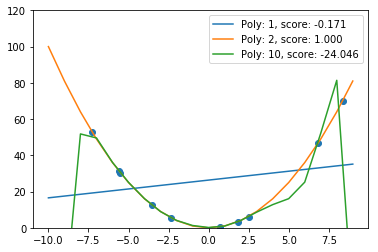

In [232]:
def linear_reg(ns, reg=LinearRegression()):
    x_train = np.random.uniform(-10, 10, 10).reshape(-1, 1)
    y_train = f(x_train)
    x_test = np.arange(-10, 10, 1).reshape(-1, 1)
    y_test = f(x_test)
    plt.scatter(x_train, y_train)
    legend = []
    for n in ns:
        model = make_pipeline(PolynomialFeatures(degree=n), reg)
        model.fit(x_train, y_train)
        y_pred = model.predict(x_test)
        legend.append('Poly: %d, score: %.3f' %(n, model.score(x_test, y_test)))
        plt.plot(x_test, y_pred)
    
    plt.ylim(0, 120)
    plt.legend(legend)
    plt.show()

linear_reg([1, 2, 10])

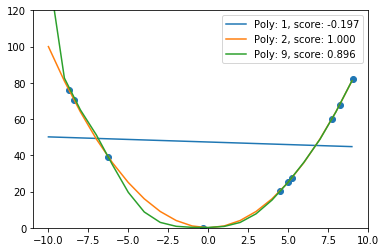

In [237]:
linear_reg([1, 2, 9], reg=Ridge(alpha=1.0))

In [ ]:
def categorize_columns(df, columns=[], used_uniq=3):
    df = df.copy()
    for column in columns:
        uniq = data.groupby(column).size().sort_values()
        mask = [df[column]==uniq_value for uniq_value in list(uniq.tail(used_uniq).index)]
        df[column] = np.where(np.logical_or.reduce((mask)), df[column], 'OTHER')
    return  df

def prepare_data(data):
    columns = data.select_dtypes(include='object').columns.values
    print(columns)
    prep_data = categorize_columns(data, columns, used_uniq=5)
    prep_data = pd.get_dummies(prep_data, columns=columns, prefix = columns)
    float_columns = data.select_dtypes(include='float64').columns.values
    scaler = StandardScaler()
    prep_data[float_columns] = scaler.fit_transform(prep_data[float_columns])
    return prep_data

data = prepare_data(data)
data.info()